# Validation of RBSA 2014 discrete data through loadshape comparison

Input: 
- model must use implicit appliance definitions
- paneldump of the model using 1 hr interval (3600) to ensure energy output

Import the panel dump 

In [1]:
import csv
import json
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib as matplotlib
import numpy as np
from datetime import datetime
import time
import glmptime as glmptime

panel_dump = "paneldump/paneldump_Full_Electric"
loadshape = {}
with open(panel_dump, newline='') as csvfile : 
    fr = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(fr)
    for row in fr :
        print(row)
        row_3 = float(row[3])
        if not loadshape : # populating the first line
            loadshape[row[0]] = {row[1]:{row[2]:row_3}}
        else : # any additional lines 
            if row[0] in loadshape : # Checking if the timestamp is already present 
                if row[1] in loadshape[row[0]].keys() :# Checking if house is present 
                    if row[2] not in loadshape[row[0]][row[1]].keys() : # Check that the appliance is not already in
                        loadshape[row[0]][row[1]].update({row[2]:row_3})# Add another appliance 
                    else : 
                        print('ERROR duplicate appliance', loadshape[row[2]] ,'entry in the same house', loadshape[row[1]])
                else : # if house is not already in the dict
                    loadshape[row[0]][row[1]]={row[2]:row_3}
            else : # if new timestamp 
                loadshape[row[0]] = {row[1]:{row[2]:row_3}}

['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'HVAC', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'LIGHTS', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'PLUGS', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'DISHWASHER', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'MICROWAVE', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'FREEZER', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'REFRIGERATOR', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'RANGE', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'WATERHEATER', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'CLOTHESWASHER', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'DRYER', '0', '0']
['2018-01-15 00:00:00 PST', 'house_2_ELEC', 'HVAC', '0', '0']
['2018-01-15 00:00:00 PST', 'house_2_ELEC', 'LIGHTS', '0', '0']
['2018-01-15 00:00:00 PST', 'house_2_ELEC', 'PLUGS', '0', '0']
['2018-01-15 00:00:00 PST', 'house_2_ELEC', 'DISHWASHER', '0', '0']
['2018-01-15 00:00

['2018-01-18 03:00:00 PST', 'house_3_ELEC', 'DRYER', '0.00699977', '0.000997413']
['2018-01-18 03:00:00 PST', 'house_2_ELEC', 'HVAC', '0', '0']
['2018-01-18 03:00:00 PST', 'house_2_ELEC', 'LIGHTS', '0.309644', '0.0776042']
['2018-01-18 03:00:00 PST', 'house_2_ELEC', 'PLUGS', '0.36', '0.174356']
['2018-01-18 03:00:00 PST', 'house_2_ELEC', 'DISHWASHER', '0.00129996', '0.000263969']
['2018-01-18 03:00:00 PST', 'house_2_ELEC', 'MICROWAVE', '0.009', '0.00918184']
['2018-01-18 03:00:00 PST', 'house_2_ELEC', 'FREEZER', '0.143999', '0.0697421']
['2018-01-18 03:00:00 PST', 'house_2_ELEC', 'REFRIGERATOR', '0.141999', '0.0687735']
['2018-01-18 03:00:00 PST', 'house_2_ELEC', 'RANGE', '0.00899968', '0.0055775']
['2018-01-18 03:00:00 PST', 'house_2_ELEC', 'WATERHEATER', '0.15', '0']
['2018-01-18 03:00:00 PST', 'house_2_ELEC', 'CLOTHESWASHER', '0.0019', '0.000920212']
['2018-01-18 03:00:00 PST', 'house_2_ELEC', 'DRYER', '0.00699977', '0.000997414']
['2018-01-18 03:00:00 PST', 'house_1_ELEC', 'HVAC', 

In [2]:
print(loadshape)

{'2018-01-15 00:00:00 PST': {'house_3_ELEC': {'HVAC': 0.0, 'LIGHTS': 0.0, 'PLUGS': 0.0, 'DISHWASHER': 0.0, 'MICROWAVE': 0.0, 'FREEZER': 0.0, 'REFRIGERATOR': 0.0, 'RANGE': 0.0, 'WATERHEATER': 0.0, 'CLOTHESWASHER': 0.0, 'DRYER': 0.0}, 'house_2_ELEC': {'HVAC': 0.0, 'LIGHTS': 0.0, 'PLUGS': 0.0, 'DISHWASHER': 0.0, 'MICROWAVE': 0.0, 'FREEZER': 0.0, 'REFRIGERATOR': 0.0, 'RANGE': 0.0, 'WATERHEATER': 0.0, 'CLOTHESWASHER': 0.0, 'DRYER': 0.0}, 'house_1_ELEC': {'HVAC': 0.0, 'LIGHTS': 0.0, 'PLUGS': 0.0, 'DISHWASHER': 0.0, 'MICROWAVE': 0.0, 'FREEZER': 0.0, 'REFRIGERATOR': 0.0, 'RANGE': 0.0, 'WATERHEATER': 0.0, 'CLOTHESWASHER': 0.0, 'DRYER': 0.0}}, '2018-01-15 01:00:00 PST': {'house_3_ELEC': {'HVAC': 0.0, 'LIGHTS': 0.326846, 'PLUGS': 0.38, 'DISHWASHER': 0.0028999, 'MICROWAVE': 0.009, 'FREEZER': 0.147999, 'REFRIGERATOR': 0.149999, 'RANGE': 0.00899961, 'WATERHEATER': 0.19, 'CLOTHESWASHER': 0.0024, 'DRYER': 0.0159994}, 'house_2_ELEC': {'HVAC': 0.0, 'LIGHTS': 0.326846, 'PLUGS': 0.38, 'DISHWASHER': 0.0028

In [3]:
loadshape_per_appliance = {} 

# {time : {hvac:sum, lights:sum,...etc }
for t in loadshape.keys() :
    e_val = 0 #resetting energy value at each time stamp 
    appl_dict = [] # resetting the appliance dict at each timestamp
    for h in loadshape[t].keys() : 
        appl_dict.append(loadshape[t][h]) 
    c = Counter()
    for a in appl_dict:
        c.update(a)
    loadshape_per_appliance[t]=dict(c)
print(loadshape_per_appliance) #sum of energy per appliance per time step


{'2018-01-15 00:00:00 PST': {'HVAC': 0.0, 'LIGHTS': 0.0, 'PLUGS': 0.0, 'DISHWASHER': 0.0, 'MICROWAVE': 0.0, 'FREEZER': 0.0, 'REFRIGERATOR': 0.0, 'RANGE': 0.0, 'WATERHEATER': 0.0, 'CLOTHESWASHER': 0.0, 'DRYER': 0.0}, '2018-01-15 01:00:00 PST': {'HVAC': 0.0, 'LIGHTS': 0.980537, 'PLUGS': 1.1400000000000001, 'DISHWASHER': 0.0086997, 'MICROWAVE': 0.026999999999999996, 'FREEZER': 0.443997, 'REFRIGERATOR': 0.449997, 'RANGE': 0.02699882, 'WATERHEATER': 0.5700000000000001, 'CLOTHESWASHER': 0.0072, 'DRYER': 0.0479981}, '2018-01-15 02:00:00 PST': {'HVAC': 0.0, 'LIGHTS': 0.954735, 'PLUGS': 1.1099999999999999, 'DISHWASHER': 0.00479985, 'MICROWAVE': 0.026999999999999996, 'FREEZER': 0.43499699999999997, 'REFRIGERATOR': 0.43799699999999997, 'RANGE': 0.02699894, 'WATERHEATER': 0.48, 'CLOTHESWASHER': 0.006, 'DRYER': 0.02999894}, '2018-01-15 03:00:00 PST': {'HVAC': 0.0, 'LIGHTS': 0.9289319999999999, 'PLUGS': 1.08, 'DISHWASHER': 0.0038998799999999997, 'MICROWAVE': 0.026999999999999996, 'FREEZER': 0.431996

Breaking the dictionary down into lists for plotting

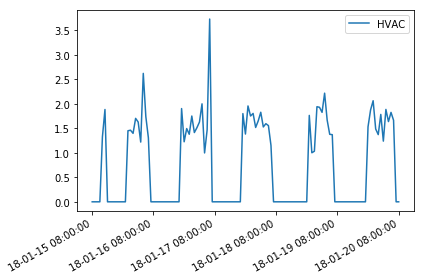

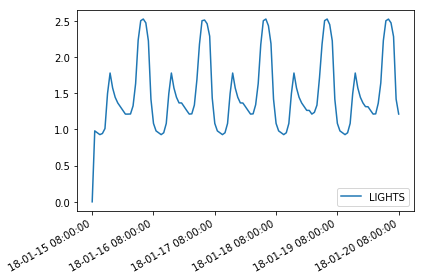

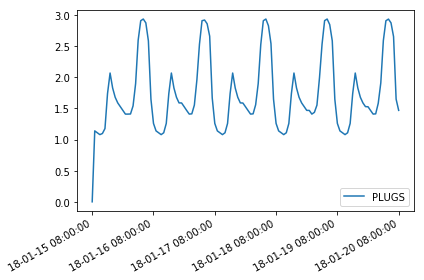

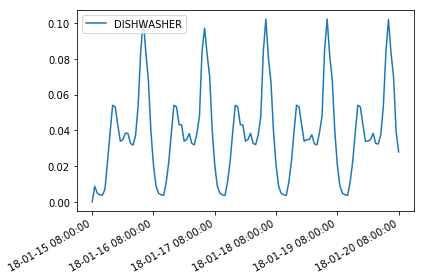

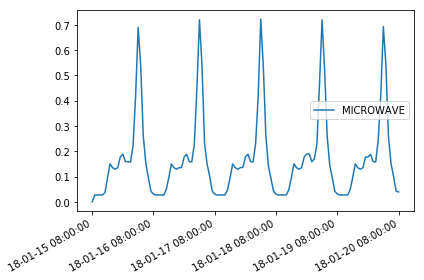

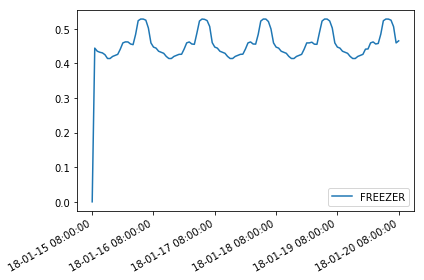

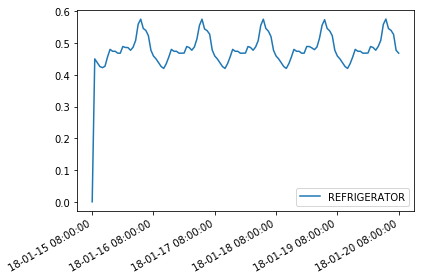

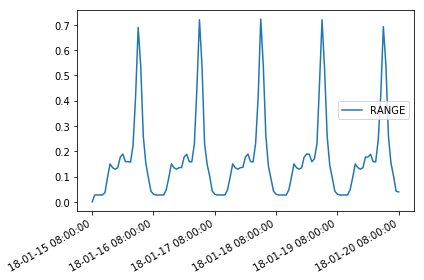

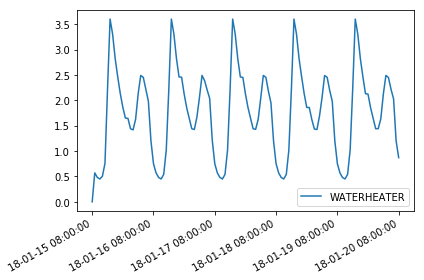

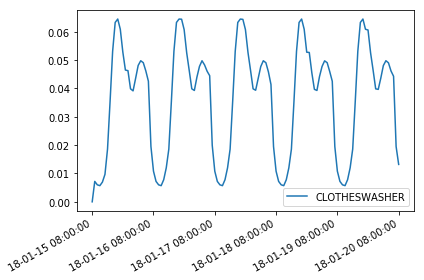

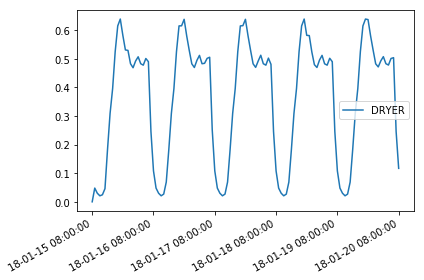

<Figure size 432x288 with 0 Axes>

In [4]:
plt_list = []
for t,val in loadshape_per_appliance.items() : 
    for a, e in val.items() : 
        plt_list.append([t,e,a])

appliance_list = []
for l in plt_list : 
    if l[2] not in appliance_list :
        appliance_list.append(l[2])
a_list = []   
for a in appliance_list : 
    x = []
    y = []
    a_E = 0
    for l in plt_list : 
        if a in l : 
            x.append(glmptime.glmptime(l[0]))
            y.append(l[1])
    a_list.append([a,sum(y)])
    plt.plot(x,y,label=a)  
    # beautify the x-labels
    plt.gcf().autofmt_xdate()
    myFmt = md.DateFormatter('%y-%m-%d %H:%M:%S')
    plt.gca().xaxis.set_major_formatter(myFmt)
    plt.legend()
    plt.tight_layout()
    tmp = plt.gcf() # get current figure
    plt.show()
    plt.draw()
    tmp.savefig("output_loadshapes/loadshape_" + a + ".png")

In [5]:
# Print total energy per appliance
print(a_list)

[['HVAC', 92.26127160000001], ['LIGHTS', 181.65343900000002], ['PLUGS', 211.25898900000007], ['DISHWASHER', 4.69224042], ['MICROWAVE', 20.6357508], ['FREEZER', 54.872313000000034], ['REFRIGERATOR', 57.96088099999999], ['RANGE', 20.633822659999996], ['WATERHEATER', 214.13449800000004], ['CLOTHESWASHER', 4.399924500000002], ['DRYER', 44.15820704999998]]


# Plotting original loadshapes 

[0.42, 0.38, 0.37, 0.36, 0.37, 0.42, 0.58, 0.69, 0.61, 0.56, 0.53, 0.51, 0.49, 0.47, 0.47, 0.51, 0.63, 0.84, 0.97, 0.98, 0.96, 0.89, 0.74, 0.55]


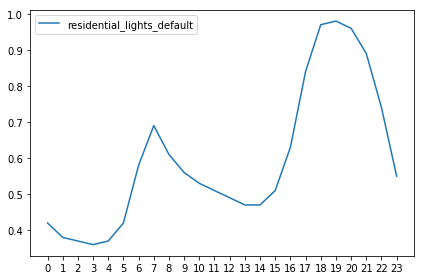

[0.42, 0.38, 0.37, 0.36, 0.37, 0.42, 0.58, 0.69, 0.61, 0.56, 0.53, 0.51, 0.49, 0.47, 0.47, 0.51, 0.63, 0.84, 0.97, 0.98, 0.96, 0.89, 0.74, 0.55]


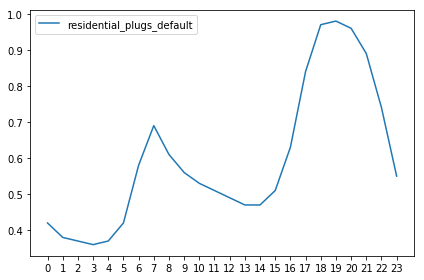

[0.0068, 0.0029, 0.0016, 0.0013, 0.0012, 0.0037, 0.0075, 0.0129, 0.018, 0.0177, 0.0144, 0.0113, 0.0116, 0.0128, 0.0109, 0.0105, 0.0124, 0.0156, 0.0278, 0.0343, 0.0279, 0.0234, 0.0194, 0.0131]


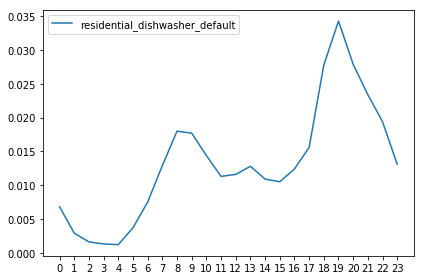

[0.01, 0.009, 0.009, 0.009, 0.009, 0.016, 0.032, 0.05, 0.045, 0.043, 0.045, 0.059, 0.063, 0.053, 0.052, 0.072, 0.138, 0.242, 0.182, 0.088, 0.051, 0.034, 0.022, 0.014]


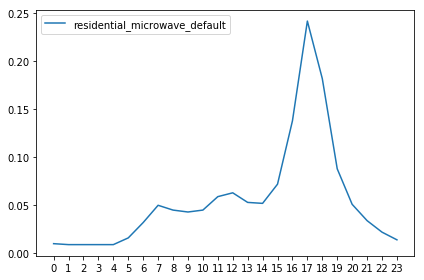

[0.149, 0.148, 0.145, 0.144, 0.143, 0.14, 0.138, 0.138, 0.14, 0.141, 0.142, 0.147, 0.153, 0.154, 0.152, 0.151, 0.161, 0.174, 0.176, 0.176, 0.175, 0.169, 0.16, 0.153]


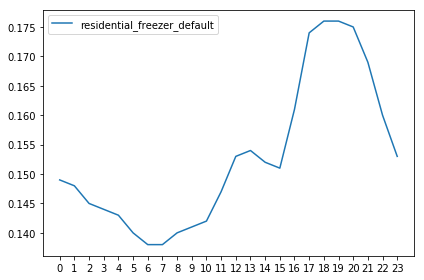

[0.153, 0.15, 0.146, 0.142, 0.14, 0.145, 0.152, 0.16, 0.158, 0.158, 0.156, 0.156, 0.163, 0.162, 0.159, 0.162, 0.169, 0.185, 0.192, 0.182, 0.18, 0.176, 0.167, 0.159]


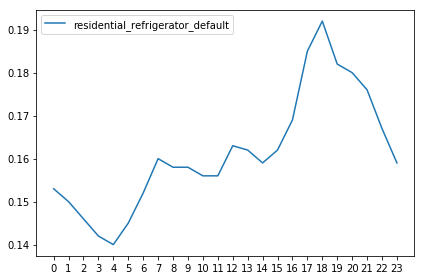

[0.01, 0.009, 0.009, 0.009, 0.009, 0.016, 0.032, 0.05, 0.045, 0.043, 0.045, 0.059, 0.063, 0.053, 0.052, 0.072, 0.138, 0.242, 0.182, 0.088, 0.051, 0.034, 0.022, 0.014]


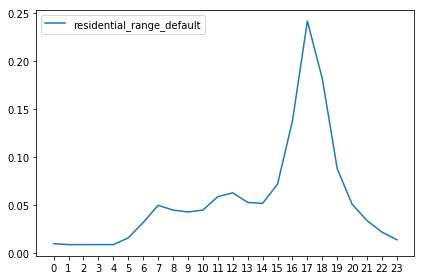

[0.25, 0.19, 0.16, 0.15, 0.18, 0.34, 0.74, 1.2, 1.1, 0.94, 0.82, 0.71, 0.62, 0.55, 0.48, 0.47, 0.54, 0.68, 0.83, 0.82, 0.74, 0.68, 0.57, 0.4]


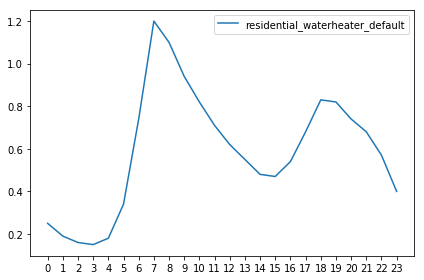

[0.0036, 0.0024, 0.002, 0.0019, 0.0026, 0.004, 0.0062, 0.0118, 0.0177, 0.0211, 0.0215, 0.0203, 0.0176, 0.0155, 0.0133, 0.013, 0.0145, 0.0159, 0.0166, 0.0164, 0.0154, 0.0149, 0.011, 0.0065]


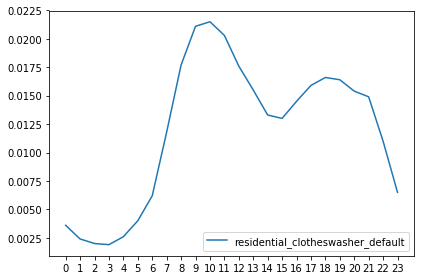

[0.036, 0.016, 0.01, 0.007, 0.009, 0.023, 0.061, 0.103, 0.132, 0.175, 0.205, 0.213, 0.194, 0.177, 0.161, 0.156, 0.164, 0.171, 0.161, 0.159, 0.167, 0.169, 0.138, 0.082]


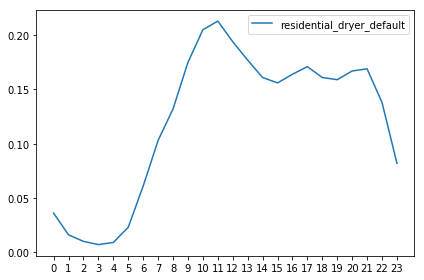

<Figure size 432x288 with 0 Axes>

In [6]:
input_loadshape_file = "rbsa2014_discrete.txt"
appliance_list = ['lights', 'plugs', 'clotheswasher', 'waterheater', 'refrigerator', 'dryer', 'freezer', 'dishwasher',
                 'range','microwave']
input_loadshape = {}
h_list = []
val_list = []
final_input = {}
with open('schedules.json','r') as j_file :
    data_sched = json.load(j_file)
    for appliance_type in data_sched['schedules'] : 
        week_day_winter = data_sched['schedules'][appliance_type].split('weekday-winter')[1].split('}')[0]+'}'
        input_loadshape[appliance_type] = week_day_winter
        week_day_winter_split = week_day_winter.split(';') # list of sched specifications of each appliance
#         print(len(week_day_winter_split))
        h_list = []
        val_list = []
        for w_line in week_day_winter_split : 
            h_list.append(w_line.replace('{','').split()[1])
            val_list.append(float(w_line.replace('{','').replace('}','').split()[5]))
        print(val_list)
        final_input[appliance_type]=val_list

        plt.plot(h_list,val_list,label=appliance_type)  
        # beautify the x-labels
        plt.legend()
        plt.tight_layout()
        tmp = plt.gcf() # get current figure
        plt.show()
        plt.draw()
        tmp.savefig("output_loadshapes/loadshape_" + a + ".png")

# print(input_loadshape)

In [7]:
print(final_input)


{'residential_lights_default': [0.42, 0.38, 0.37, 0.36, 0.37, 0.42, 0.58, 0.69, 0.61, 0.56, 0.53, 0.51, 0.49, 0.47, 0.47, 0.51, 0.63, 0.84, 0.97, 0.98, 0.96, 0.89, 0.74, 0.55], 'residential_plugs_default': [0.42, 0.38, 0.37, 0.36, 0.37, 0.42, 0.58, 0.69, 0.61, 0.56, 0.53, 0.51, 0.49, 0.47, 0.47, 0.51, 0.63, 0.84, 0.97, 0.98, 0.96, 0.89, 0.74, 0.55], 'residential_dishwasher_default': [0.0068, 0.0029, 0.0016, 0.0013, 0.0012, 0.0037, 0.0075, 0.0129, 0.018, 0.0177, 0.0144, 0.0113, 0.0116, 0.0128, 0.0109, 0.0105, 0.0124, 0.0156, 0.0278, 0.0343, 0.0279, 0.0234, 0.0194, 0.0131], 'residential_microwave_default': [0.01, 0.009, 0.009, 0.009, 0.009, 0.016, 0.032, 0.05, 0.045, 0.043, 0.045, 0.059, 0.063, 0.053, 0.052, 0.072, 0.138, 0.242, 0.182, 0.088, 0.051, 0.034, 0.022, 0.014], 'residential_freezer_default': [0.149, 0.148, 0.145, 0.144, 0.143, 0.14, 0.138, 0.138, 0.14, 0.141, 0.142, 0.147, 0.153, 0.154, 0.152, 0.151, 0.161, 0.174, 0.176, 0.176, 0.175, 0.169, 0.16, 0.153], 'residential_refrigera

In [8]:
a_totals = {'LIGHTS': 0.19, 'PLUGS':0.9, 'CLOTHESWASHER' : 0.5, 'WATERHEATER' : 4.0, 'REFRIGERATOR' : 4.0, 
           'DRYER': 6.0, 'FREEZER':2.4, 'DISHWASHER':1.8, 'RANGE':0.25, 'MICROWAVE':0.12}

The total amount of energy defined by the loadshape (DW) :

In [9]:
print(a_totals['DISHWASHER'])

1.8


The total amount of energy consumed by (DW) in the model output :

In [10]:
print(a_list[3][1]/5/1000)

0.000938448084


MICROWAVE from input

In [11]:
print(a_totals['MICROWAVE'])

0.12


MICROWAVE from model 

In [12]:
print(a_list[4][1]/5/1000)

0.004127150160000001


All the input values for appliance loadshapes :

In [25]:
for keys,v in a_totals.items() : 
    print("%5.2f kWh/day"%v,keys)
        
sum(final_input['residential_microwave_default'])

 0.19 kWh/day LIGHTS
 0.90 kWh/day PLUGS
 0.50 kWh/day CLOTHESWASHER
 4.00 kWh/day WATERHEATER
 4.00 kWh/day REFRIGERATOR
 6.00 kWh/day DRYER
 2.40 kWh/day FREEZER
 1.80 kWh/day DISHWASHER
 0.25 kWh/day RANGE
 0.12 kWh/day MICROWAVE


1.347

All the output values for appliance loadshapes : 

In [14]:
for i,ap in enumerate(a_list) : 
    e = a_list[i][1]/5
    eu = ap[0]
    v = ap[1]
    if eu in ["LIGHTS","PLUGS"]:
        p = a_totals[eu]
    elif eu != "HVAC":
        p = a_totals[eu]
    else:
        p = np.NaN
    print("%6.2f kWh/day"%e,"%-20.20s"%a_list[i][0],"%5.2f pu"%(e/p))

 18.45 kWh/day HVAC                   nan pu
 36.33 kWh/day LIGHTS               191.21 pu
 42.25 kWh/day PLUGS                46.95 pu
  0.94 kWh/day DISHWASHER            0.52 pu
  4.13 kWh/day MICROWAVE            34.39 pu
 10.97 kWh/day FREEZER               4.57 pu
 11.59 kWh/day REFRIGERATOR          2.90 pu
  4.13 kWh/day RANGE                16.51 pu
 42.83 kWh/day WATERHEATER          10.71 pu
  0.88 kWh/day CLOTHESWASHER         1.76 pu
  8.83 kWh/day DRYER                 1.47 pu
